# Flights Data Exploration

## Preliminary Wrangling




each entry in the airline delay database represents the aggregate monthly data for a particular air line for particular airport. 
for example one entry will be the delay information for southwest airlines at ST Louis airport during septamber 2010

each entry list number of flights , nof delayed flights(more than 15 m), nof canceled flights , no dilivered flights, the nof minutes delay becouse of each delay reason ( weather , carrier, national air system, security ) and a arr_delay colomn which sum up all delay minutes


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
delay_data_df = pd.read_csv('08_15_majorports_airline_delay_causes.csv')

In [3]:
# high-level overview of data shape and composition
print(delay_data_df.shape)
print(delay_data_df.dtypes)


(33193, 22)
year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object


In [4]:
# it seams like colomn names have some spaces , lets remove them first
delay_data_df.columns = delay_data_df.columns.str.replace(' ', '')
delay_data_df.columns


Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed:21'],
      dtype='object')

In [5]:
delay_data_df.head(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed:21
0,2008,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",157.0,36.0,4.71,0.00,...,21.43,7.0,0.0,3331.0,575.0,0.0,425.0,0.0,2331.0,NaN
1,2008,1,9E,Pinnacle Airlines Inc.,BOS,"Boston, MA: Logan International",91.0,19.0,7.93,0.00,...,5.08,6.0,0.0,1090.0,492.0,0.0,303.0,0.0,295.0,NaN
2,2008,1,9E,Pinnacle Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",59.0,17.0,6.89,4.13,...,5.00,0.0,0.0,1143.0,423.0,139.0,39.0,0.0,542.0,NaN
3,2008,1,9E,Pinnacle Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",98.0,35.0,13.58,1.47,...,8.28,4.0,0.0,1787.0,722.0,100.0,396.0,0.0,569.0,NaN
4,2008,1,9E,Pinnacle Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",112.0,13.0,3.00,1.00,...,4.28,4.0,0.0,724.0,341.0,99.0,97.0,18.0,169.0,NaN
5,2008,1,9E,Pinnacle Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",58.0,17.0,2.68,1.09,...,5.50,2.0,0.0,962.0,153.0,56.0,298.0,0.0,455.0,NaN
6,2008,1,9E,Pinnacle Airlines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County",4690.0,1192.0,261.62,26.88,...,564.15,264.0,11.0,78668.0,28259.0,2861.0,11723.0,8.0,35817.0,NaN
7,2008,1,9E,Pinnacle Airlines Inc.,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",31.0,5.0,0.39,0.00,...,1.00,0.0,0.0,215.0,7.0,0.0,102.0,0.0,106.0,NaN
8,2008,1,9E,Pinnacle Airlines Inc.,IAD,"Washington, DC: Washington Dulles International",40.0,10.0,4.68,0.00,...,2.50,2.0,0.0,520.0,243.0,0.0,97.0,0.0,180.0,NaN
9,2008,1,9E,Pinnacle Airlines Inc.,IAH,"Houston, TX: George Bush Intercontinental/Houston",143.0,45.0,10.15,3.31,...,14.89,5.0,0.0,3164.0,871.0,162.0,837.0,0.0,1294.0,NaN


In [6]:
delay_data_df["total_ct"] = delay_data_df["carrier_ct"]+delay_data_df["weather_ct"]+delay_data_df["nas_ct"]+delay_data_df["late_aircraft_ct"]+delay_data_df["security_ct"]

delay_data_df["total_delay"] = delay_data_df["carrier_delay"]+delay_data_df["weather_delay"]+delay_data_df["nas_delay"]+delay_data_df["late_aircraft_delay"]+delay_data_df["security_delay"]


In [7]:
delay_data_df.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed:21,total_ct,total_delay
0,2008,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",157.0,36.0,4.71,0.00,...,0.0,3331.0,575.0,0.0,425.0,0.0,2331.0,NaN,35.99,3331.0
1,2008,1,9E,Pinnacle Airlines Inc.,BOS,"Boston, MA: Logan International",91.0,19.0,7.93,0.00,...,0.0,1090.0,492.0,0.0,303.0,0.0,295.0,NaN,19.00,1090.0
2,2008,1,9E,Pinnacle Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",59.0,17.0,6.89,4.13,...,0.0,1143.0,423.0,139.0,39.0,0.0,542.0,NaN,16.99,1143.0


## investigate Categorical data
lets see categorical features with their values

In [8]:
delay_data_df["carrier"].unique()

array(['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA',
       'MQ', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV', 'VX', 'NK'],
      dtype=object)

In [9]:
delay_data_df["year"].unique()


array([2008, 2009, 2010, 2011, 2012, 2014, 2013, 2015], dtype=int64)

In [10]:
delay_data_df["airport"].unique()

array(['ATL', 'BOS', 'BWI', 'CLT', 'DCA', 'DFW', 'DTW', 'FLL', 'IAD',
       'IAH', 'LGA', 'MDW', 'MSP', 'PHL', 'SLC', 'DEN', 'EWR', 'HNL',
       'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PDX', 'PHX', 'SAN',
       'SEA', 'SFO', 'TPA'], dtype=object)

there are 4 categorical variables 

In [11]:
# convert year, carrier, and airport into  categorical types
ordinal_var_dict = {'year': [2008, 2009, 2010, 2011, 2012, 2014, 2013, 2015],
                    'airport':['ATL', 'BOS', 'BWI', 'CLT', 'DCA', 'DFW', 'DTW', 'FLL', 'IAD',
                       'IAH', 'LGA', 'MDW', 'MSP', 'PHL', 'SLC', 'DEN', 'EWR', 'HNL',
                       'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PDX', 'PHX', 'SAN',
                       'SEA', 'SFO', 'TPA'],
                    'carrier':['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA',
                        'MQ', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV', 'VX', 'NK'],
                    'month' :[1,2,3,4,5,6,7,8,9,10,11,12]
                   }

ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict["year"])
delay_data_df["year"] = delay_data_df["year"].astype(ordered_var)

ordered_var = pd.api.types.CategoricalDtype(ordered = False, categories = ordinal_var_dict["airport"])
delay_data_df["airport"] = delay_data_df["airport"].astype(ordered_var)

ordered_var = pd.api.types.CategoricalDtype(ordered = False, categories = ordinal_var_dict["carrier"])
delay_data_df["carrier"] = delay_data_df["carrier"].astype(ordered_var)

ordered_var = pd.api.types.CategoricalDtype(ordered = False, categories = ordinal_var_dict["month"])
delay_data_df["month"] = delay_data_df["month"].astype(ordered_var)


In [12]:
# descriptive statistics for numeric variables
print(delay_data_df.describe())

        arr_flights     arr_del15    carrier_ct    weather_ct        nas_ct  \
count  33173.000000  33172.000000  33173.000000  33173.000000  33173.000000   
mean     979.657010    187.639967     46.177288      5.581518     70.154733   
std     1820.273324    349.614647     76.623111     13.992883    143.301590   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%      124.000000     24.000000      7.450000      0.000000      7.920000   
50%      326.000000     66.000000     19.890000      1.310000     22.840000   
75%      841.000000    170.000000     48.240000      5.170000     62.320000   
max    21648.000000   5268.000000   1216.900000    469.930000   2401.790000   

        security_ct  late_aircraft_ct  arr_cancelled  arr_diverted  \
count  33173.000000      33173.000000   33173.000000  33173.000000   
mean       0.346325         65.374529      16.824225      2.348898   
std        1.008751        142.000875      52.616841      7.333180   
min     

### What is the structure of your dataset?

There are 33193 flights in the dataset with 22 colomns (year, carrier, airport, delay reason , delay minutes 
each entry is corresponding to month for one of the carriers for specific airport 
Most variables are numeric in nature

#### categorigal data 

1- Non ordinal :

    - carrier ['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA',
       'MQ', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV', 'VX', 'NK']
       
    - airport : ['ATL', 'BOS', 'BWI', 'CLT', 'DCA', 'DFW', 'DTW', 'FLL', 'IAD',
       'IAH', 'LGA', 'MDW', 'MSP', 'PHL', 'SLC', 'DEN', 'EWR', 'HNL',
       'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PDX', 'PHX', 'SAN',
       'SEA', 'SFO', 'TPA']
2- Ordinal :

    - year :[2008, 2009, 2010, 2011, 2012, 2014, 2013, 2015]
    - month :[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    
#### Numerical data 
   - every delay reason with counts forhappening ( security, Nas, late aircraft arrived, weather, carrier)
   - every delay reason with number of minutes caused for dellay due to this reason (security, Nas, late aircraft arrived, weather, carrier)
   - number of cancelation 
   - number of diverted flights
   - total number of flights for that month with this carrier to this airport

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what are most reasons for delays in flights and for predicting the arrival  delay time, 
giving these featueres so main features for detect delay reason ['carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct', 'security_ct'], and features for delay time will be ['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay', 'security_delay'].

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that weather will have the strongest effect on delaysbecouse when weather become bad will stay for some  long time and also maby some other reseans will occer most but weather will stay longer cause many minutes delay and many flights to be canceled.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: total delay time .

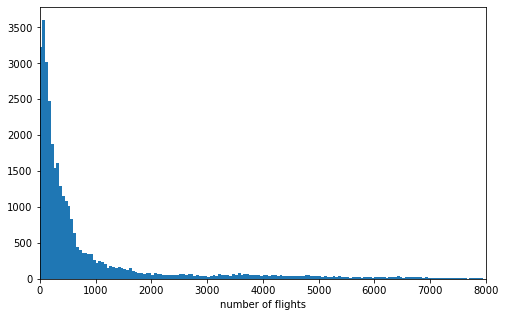

In [13]:
binsize = 50
bins = np.arange(0, delay_data_df['arr_flights'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = delay_data_df, x = 'arr_flights', bins = bins)
plt.xlabel('number of flights')
# remove noise after 10k 
plt.xlim([0,8000])
plt.show()

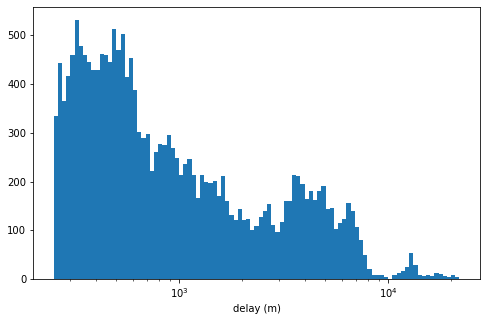

In [14]:
#convert to log plot 
# very right skewed distributoin the distribution, so let's put it on a log scale instead
log_binsize = 0.02
bins = 10 ** np.arange(2.4, np.log10(delay_data_df['arr_flights'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = delay_data_df, x = 'arr_flights', bins = bins)
plt.xscale('log')
# plt.xlim([0,15000])
# plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4][500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('delay (m)')
plt.show()

after converting to log scale it becomes bimodel normal distribution 

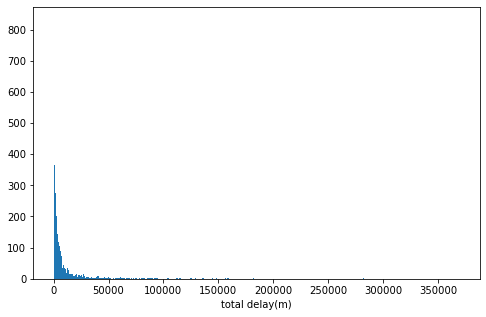

In [15]:
#standard-scaled plot
binsize = 60
bins = np.arange(0, delay_data_df['arr_delay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = delay_data_df, x = 'arr_delay', bins = bins)
plt.xlabel('total delay(m)')
# plt.xlim([0,1000])
plt.show()


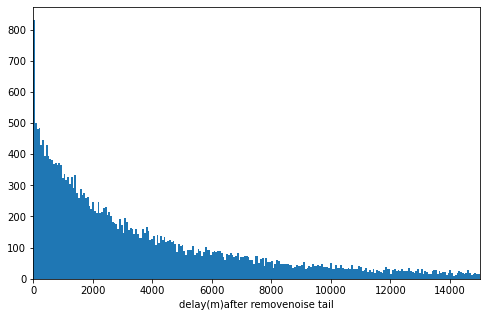

In [16]:
# very long tail so its better to limit x values 15k
binsize = 60
bins = np.arange(0, delay_data_df['arr_delay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = delay_data_df, x = 'arr_delay', bins = bins)
plt.xlabel('delay(m)after removenoise tail')
plt.xlim([0,15000])
plt.show()

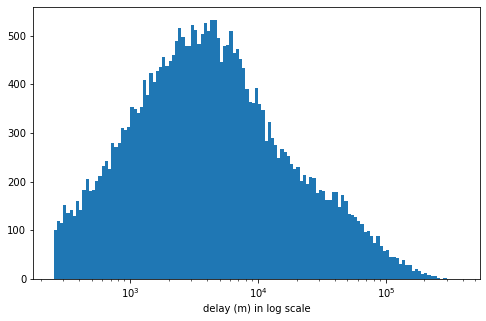

In [17]:
# very right skewed distributoin the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(delay_data_df['arr_delay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = delay_data_df, x = 'arr_delay', bins = bins)
plt.xscale('log')
# plt.xlim([0,15000])
# plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4][500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('delay (m) in log scale')
plt.show()

 When plotted on a log-scale, the deay distribution looks roughly normal distribution.

<ipython-input-18-d1a81a887ae1>:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(canceled_diverted, labels = canceled_diverted.index, loc="best")


Text(0.5, 1.0, 'the ratio between diverted,cancelled and successful flights')

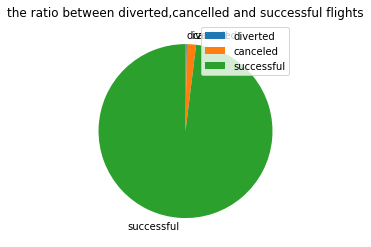

In [18]:
# Canceled and diverted 
canceled_counts = delay_data_df['arr_cancelled'].sum()
diverted_counts = delay_data_df['arr_diverted'].sum()
success_flights_counts = delay_data_df['arr_flights'].sum() - canceled_counts -diverted_counts
canceled_diverted = pd.Series([success_flights_counts,canceled_counts,diverted_counts], index=["successful","canceled","diverted"]).sort_values()

plt.pie(canceled_diverted, labels = canceled_diverted.index, startangle = 90, counterclock = False);
plt.legend(canceled_diverted, labels = canceled_diverted.index, loc="best")
plt.title("the ratio between diverted,cancelled and successful flights")


the most of flights arrive sucessfully , and a smaller numer diverted and very small canceled 

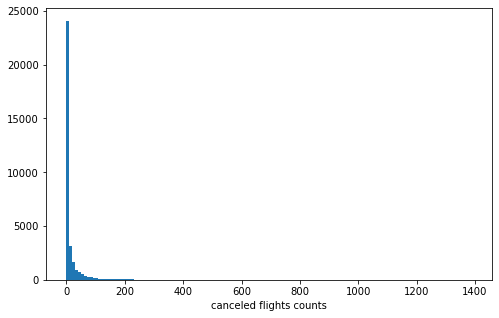

In [19]:
binsize = 10
bins = np.arange(0, delay_data_df['arr_cancelled'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = delay_data_df, x = 'arr_cancelled', bins = bins)
plt.xlabel('canceled flights counts')
# plt.xlim([0,1000])
plt.show()

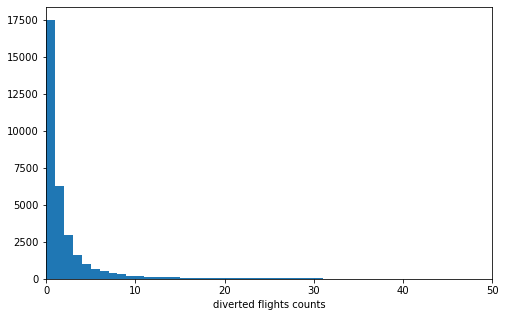

In [20]:
#also plot histo for arr_diverted
binsize = 1
bins = np.arange(0, delay_data_df['arr_diverted'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = delay_data_df, x = 'arr_diverted', bins = bins)
plt.xlabel('diverted flights counts')
plt.xlim([0,50])
plt.show()

it seems that many records with zero diverted , this rows could be removed as there should be no delays 

we need plot that can show errors and outliers in the data 

In [21]:
delay_data_df[delay_data_df['arr_diverted']== 0].head()


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed:21,total_ct,total_delay
0,2008,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",157.0,36.0,4.71,0.00,...,0.0,3331.0,575.0,0.0,425.0,0.0,2331.0,NaN,35.99,3331.0
1,2008,1,9E,Pinnacle Airlines Inc.,BOS,"Boston, MA: Logan International",91.0,19.0,7.93,0.00,...,0.0,1090.0,492.0,0.0,303.0,0.0,295.0,NaN,19.00,1090.0
2,2008,1,9E,Pinnacle Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",59.0,17.0,6.89,4.13,...,0.0,1143.0,423.0,139.0,39.0,0.0,542.0,NaN,16.99,1143.0
3,2008,1,9E,Pinnacle Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",98.0,35.0,13.58,1.47,...,0.0,1787.0,722.0,100.0,396.0,0.0,569.0,NaN,34.99,1787.0
4,2008,1,9E,Pinnacle Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",112.0,13.0,3.00,1.00,...,0.0,724.0,341.0,99.0,97.0,18.0,169.0,NaN,13.00,724.0


In [22]:
#there are some data till nearly 300 after theat there are outlies so lets discover them 
delay_data_df[delay_data_df['arr_cancelled']>450].head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed:21,total_ct,total_delay
139,2008,1,EV,Atlantic Southeast Airlines,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",11097.0,2571.0,1216.90,166.18,...,11.0,143978.0,83196.0,12399.0,31124.0,122.0,17137.0,NaN,2570.99,143978.0
216,2008,1,MQ,American Eagle Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",7568.0,3107.0,252.85,55.18,...,17.0,246841.0,27442.0,6731.0,119577.0,29.0,93062.0,NaN,3106.99,246841.0
281,2008,1,OO,SkyWest Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",4085.0,1381.0,142.00,27.00,...,4.0,144669.0,9548.0,3066.0,107338.0,39.0,24678.0,NaN,1381.00,144669.0
444,2008,2,AA,American Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",5688.0,2374.0,255.35,39.37,...,19.0,168476.0,21550.0,3266.0,90082.0,0.0,53578.0,NaN,2374.00,168476.0
625,2008,2,MQ,American Eagle Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",6994.0,3073.0,220.21,79.28,...,30.0,222755.0,26193.0,8287.0,91552.0,16.0,96707.0,NaN,3073.00,222755.0


## Delay factors 
thi section to discuss the dely factors 
how much each factor contribuite in the delay in counts or minutes. 

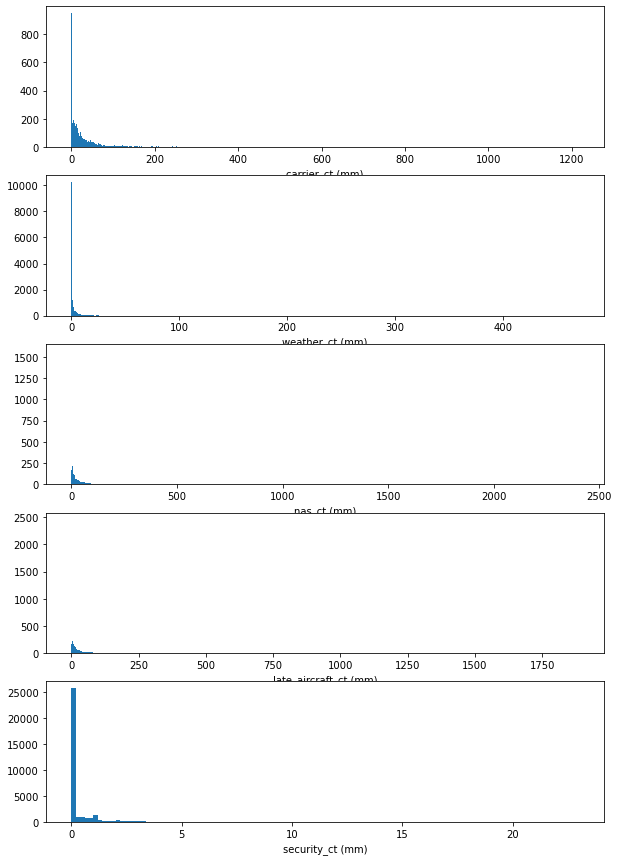

In [23]:
# let's see the distribution of all counts caouses for the delay .
# remove zer0 min delays as ther are no zero delays 

fig, ax = plt.subplots(nrows=5, figsize = [10,15])

variables = ['carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct', 'security_ct']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(delay_data_df[var]), max(delay_data_df[var])+0.2, 0.2)
    ax[i].hist(data = delay_data_df, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

The initial plot ofdelay factors show that the are all left skewed with most of values are zero and very long tail s outlier so lets remove outliers and view only values which is not zero

In [24]:
# select low and high outliers, using criteria eyeballed from the plots

outliers = ( (delay_data_df['carrier_ct'] > 250) | (delay_data_df['weather_ct'] > 30) | (delay_data_df['nas_ct']> 100)
                | (delay_data_df['late_aircraft_ct'] > 100)| (delay_data_df['security_ct'] > 5) )
print("total numbr of outliers to be removed because their values very high")
print(outliers.sum())

total numbr of outliers to be removed because their values very high
6873


In [25]:
# remove points with inconsistent depth values.
delay_data_df = delay_data_df.loc[-outliers]

There are 6873 outliers with unusually low values for delay counts. Interestingly, these counts tend to be fairly high
Most of the high outliers appear to be valid points for some urgent casses it may be represent the whole delay,

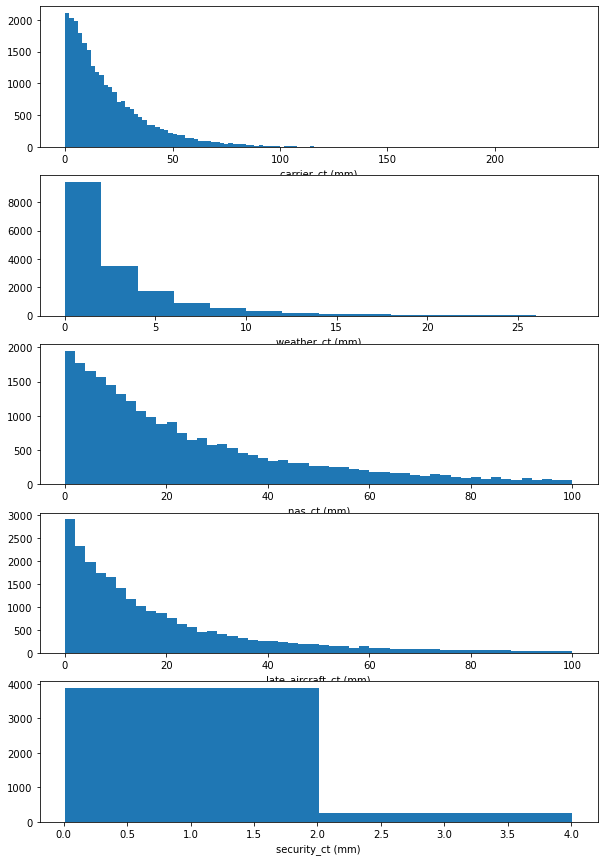

In [26]:
# REPLOT
# we can also try view them without the zero values as zeros is not delay and its happening most of time 

fig, ax = plt.subplots(nrows=5, figsize = [10,15])

variables = ['carrier_ct', 'weather_ct', 'nas_ct', 'late_aircraft_ct', 'security_ct']
for i in range(len(variables)):
    var = variables[i]
    delay_data_df_without_zero = delay_data_df[delay_data_df[var]!=0]
    bins = np.arange(min(delay_data_df_without_zero[var]), max(delay_data_df_without_zero[var])+0.2, 2)
    ax[i].hist(data = delay_data_df_without_zero, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

after cleaning the values 

its likely that least common common issue it security delay followed by weather ,
and the most common isuue for delay was due to carrier, followed by both (late aircraft arrive or nas ) maybe the are related as they have almost same distribution , we can invistgate it later 

lets do same for delay factors with minutes

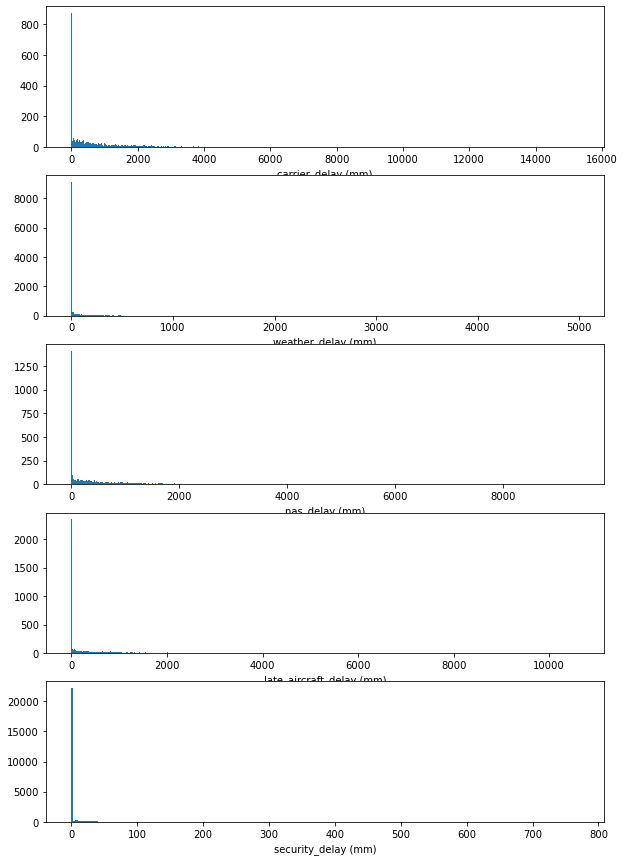

In [27]:
# let's see do the same for minutes .
# remove zer0 min delays as ther are no zero delays 

fig, ax = plt.subplots(nrows=5, figsize = [10,15])

variables = ['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay', 'security_delay']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(delay_data_df[var]), max(delay_data_df[var])+0.2, 2)
    ax[i].hist(data = delay_data_df, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

too many zero values related to other values, we can view values other than zeros and remove any outliers 

In [28]:
# select low and high outliers, using criteria eyeballed from the plots

outliers = ( (delay_data_df['carrier_delay'] > 4000) | (delay_data_df['weather_delay'] > 600) | (delay_data_df['nas_delay']> 2000)
                | (delay_data_df['late_aircraft_delay'] > 2000)| (delay_data_df['security_delay'] > 60) )

print("total numbr of outliers to be removed because their values very high")
print(outliers.sum())

total numbr of outliers to be removed because their values very high
7614


In [29]:
# remove points with inconsistent depth values.
delay_data_df = delay_data_df.loc[-outliers]

There are 6873 outliers with unusually low values for delay counts. Interestingly, these counts tend to be fairly high
Most of the high outliers appear to be valid points for some urgent casses it may be represent the whole delay,

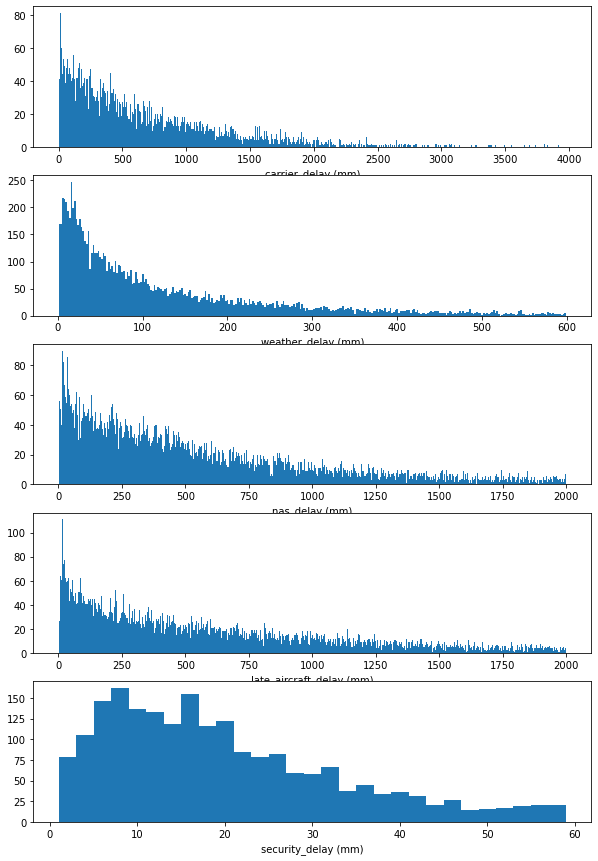

In [30]:
# REPLOT
# we can also try view them without the zero values as zeros is not delay and its happening most of time 

fig, ax = plt.subplots(nrows=5, figsize = [10,15])

variables = ['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay', 'security_delay']
for i in range(len(variables)):
    var = variables[i]
    delay_data_df_without_zero = delay_data_df[delay_data_df[var]!=0]
    bins = np.arange(min(delay_data_df_without_zero[var]), max(delay_data_df_without_zero[var])+0.2, 2)
    ax[i].hist(data = delay_data_df_without_zero, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

its likely that least delay range of values for security which is also least common issue followed by weather ,
and the most delay time isuue  was due to carrier, followed by both (late aircraft arrive or nas ) maybe the are related as they have almost same distribution , we can invistgate it later 

all the distributions are  skewed to the left and they can be converted to log scale to be able to detect their model


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The total delayed minutes variable took on a large range of values, so I looked at the data using a log transform. Under the transformation

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


yes some outliers where very far from the data removed and also all colomns have many zeros so  to draw the distripution for the real delay or real counts i draw data without zeros to see the distribution

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [31]:
numeric_vars = [ 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']
categoric_vars = ['year' ,'carrier' ,'month' ,'airport']

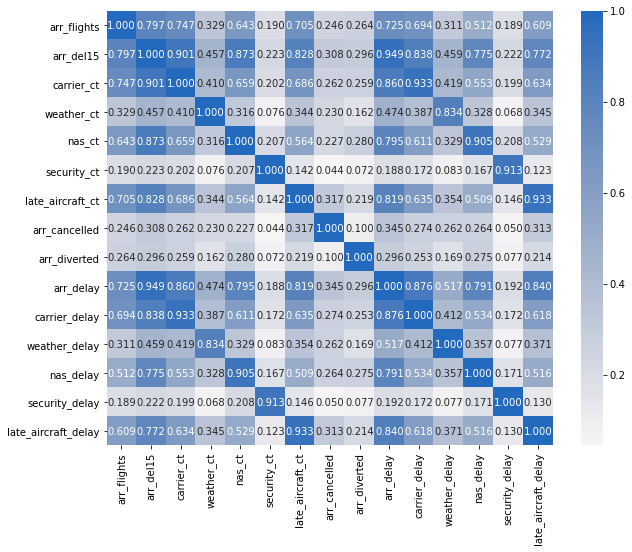

In [32]:
# correlation plot
plt.figure(figsize = [10, 8])
sb.heatmap(delay_data_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

because  there are 2 colomns for every delay reson one for count and other for minutes , its likely many colomns has correlations with others, we can see also thatarr_canceled and arr_diverted corelate very slightly with some other values   

In [33]:
#we can devide them in 2 groups and visualize some samples of them 
#adding arr flights to see if it correlate with any of them
counts_col =[ 'total_ct','carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct','arr_flights']
minutes_col=['total_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay','arr_flights']

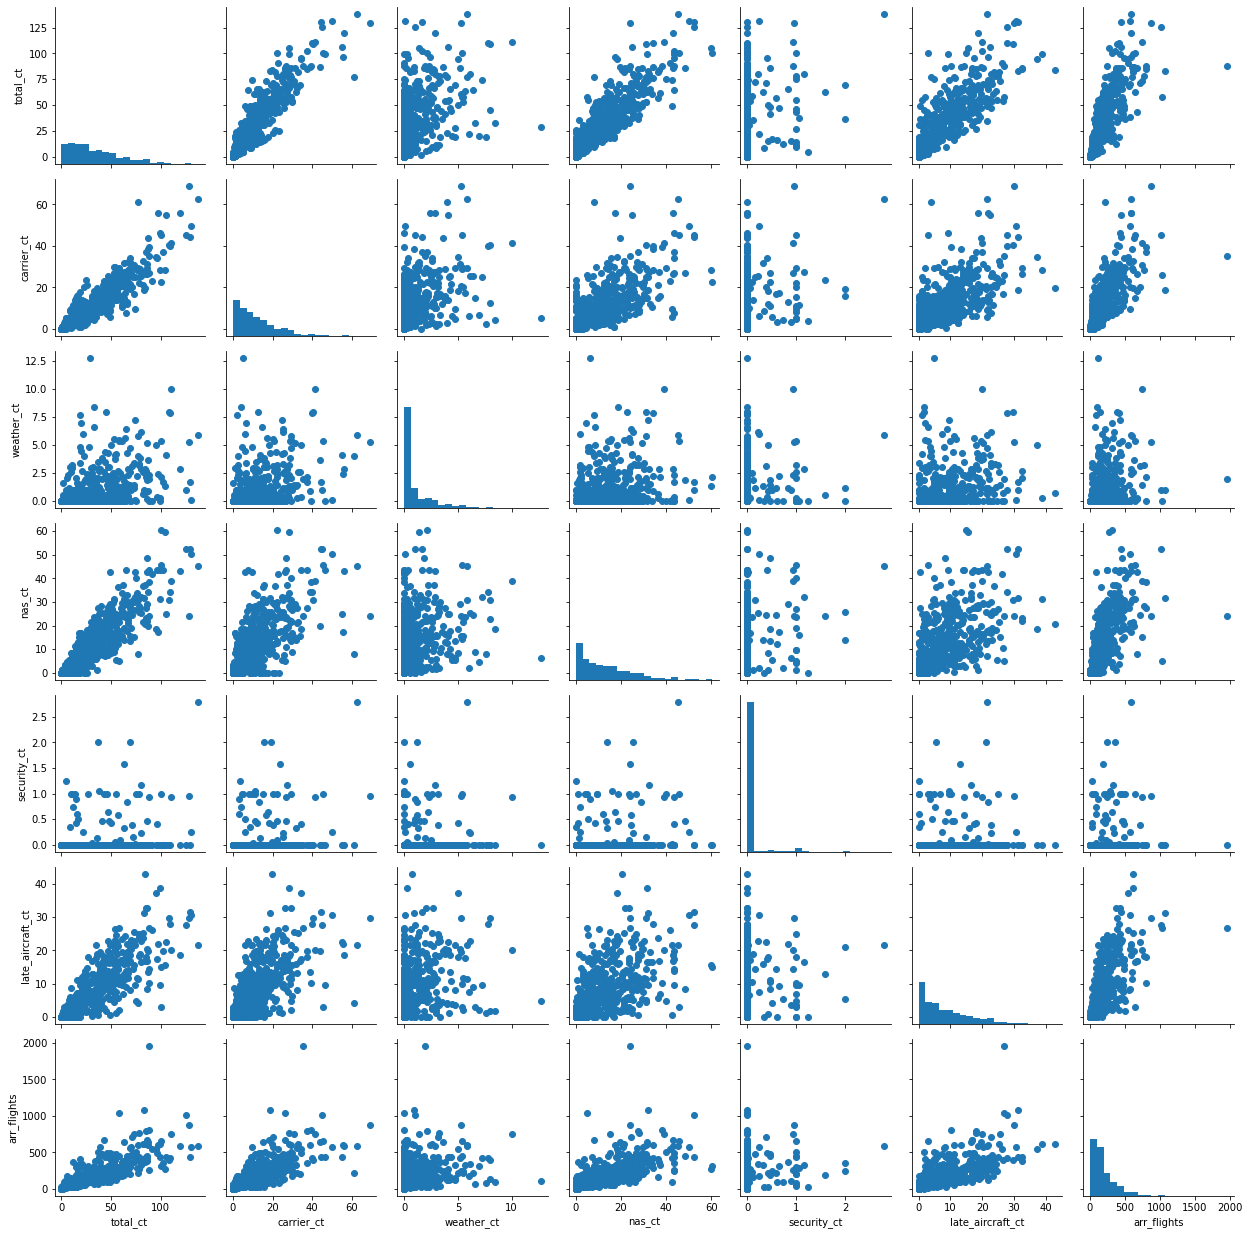

In [34]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
delay_data_df = delay_data_df.reset_index()
samples = np.random.choice(delay_data_df.shape[0], 500, replace = False)
96607
samp_ = delay_data_df.loc[samples,counts_col]

g = sb.PairGrid(data = samp_, vars = counts_col)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

carrier counts correlate positively with (nas ,late_aircraft )

security count doesnt correlate  with any but it has some intersteng pattern with most of them zeros and ones 

weather slightly correlate with carrier

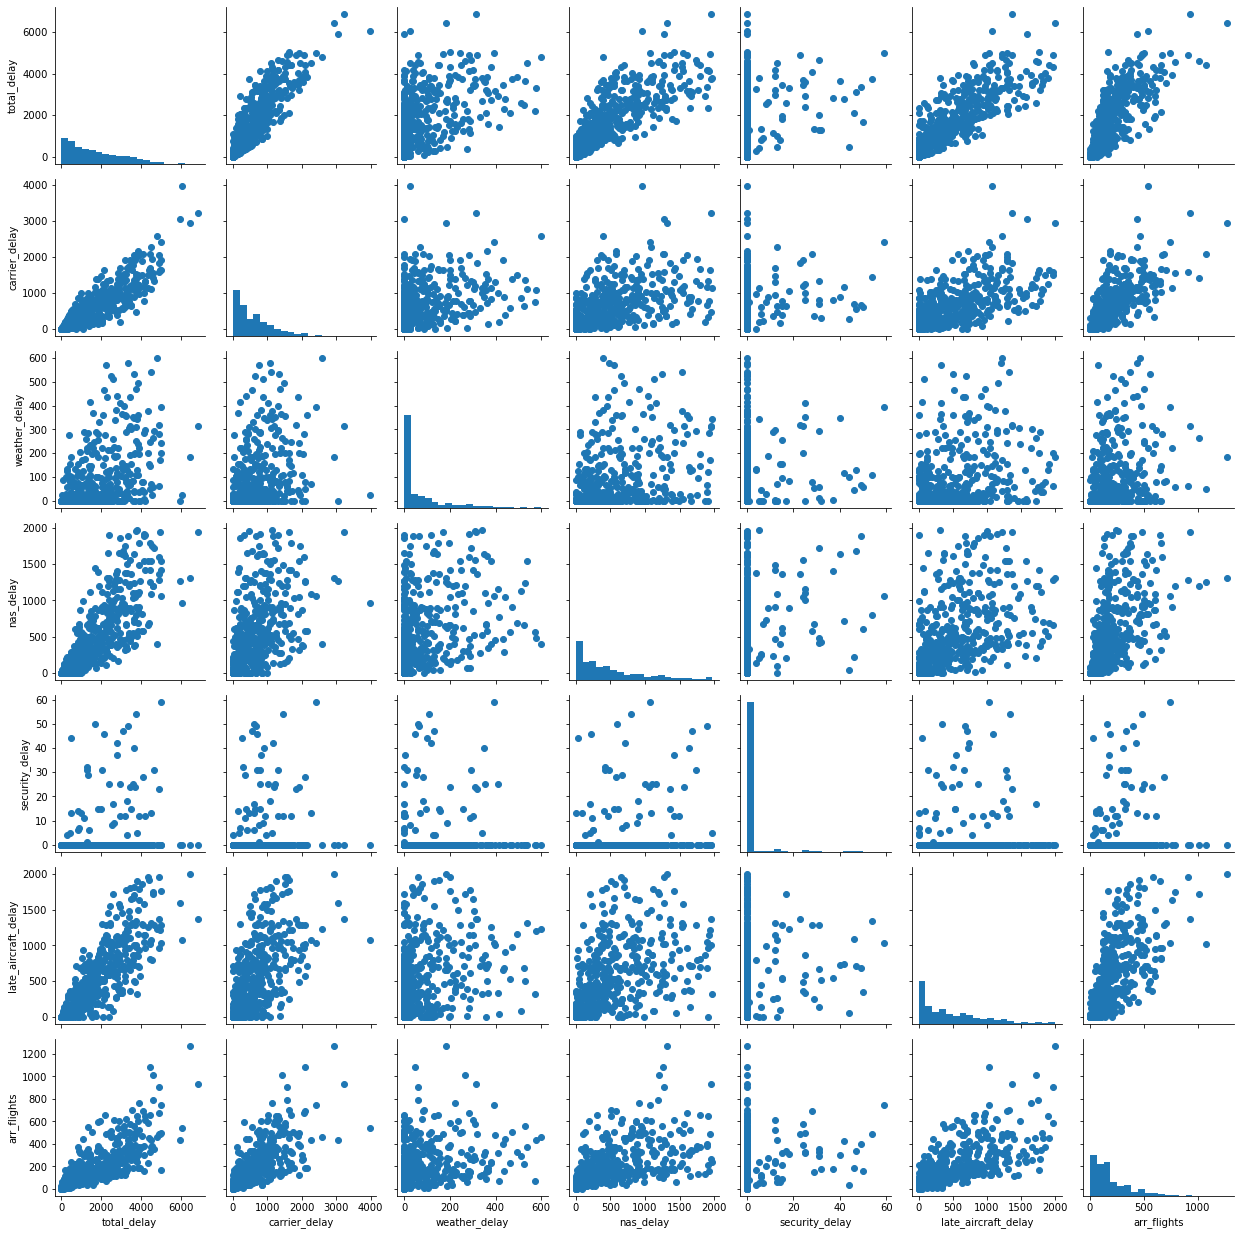

In [35]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(delay_data_df.shape[0], 500, replace = False)
96607
samp_ = delay_data_df.loc[samples,minutes_col]

g = sb.PairGrid(data = samp_, vars = minutes_col)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

carrier counts correlate positively with (nas ,late_aircraft )
security count doesnt correlate  with any other
weather slightly correlate with 

C:\Users\Hasnaa\anaconda3\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\Hasnaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hasnaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hasnaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.

<Figure size 1440x1440 with 0 Axes>

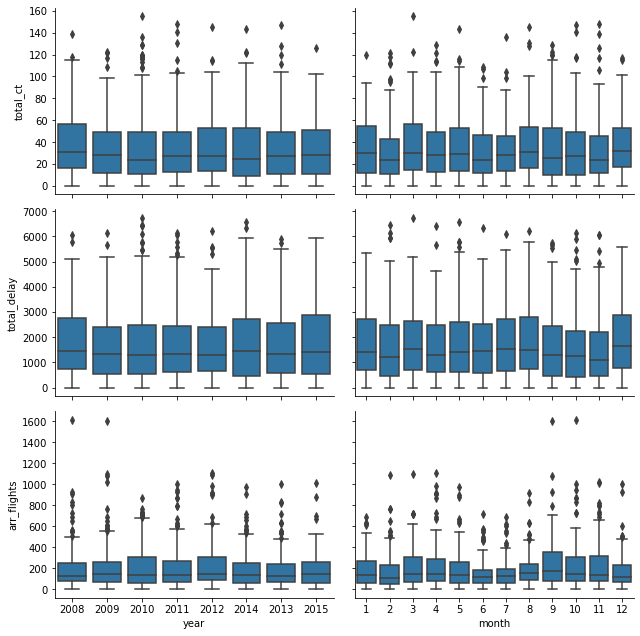

In [36]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(delay_data_df.shape[0], 2000, replace = False)
samp_ = delay_data_df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = samp_, y_vars = ['total_ct', 'total_delay','arr_flights'], x_vars = ['year','month'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

lets start by investigate the months, its likely that september has the least delay avearage and in month december is the most,
its likely becouse of end of year holidays ,
and also for April Idont know exactly why , but also has the maximum minutes for total delay 

by investigating the years, it shows that 2011 has slightly higher avarage and 2013 the most 
so more investigation for the count of the flights per years an months needs to be investigated to ansewr these questions 

for count of flights per years it seams very noisy but generally 2012 has slightly higher avg than others,
for months it start low av then decrease at months 5,6,7 and back to increase again in 9,10 at end it decreases again


Text(0, 0.5, 'delay in minutes with carriers')

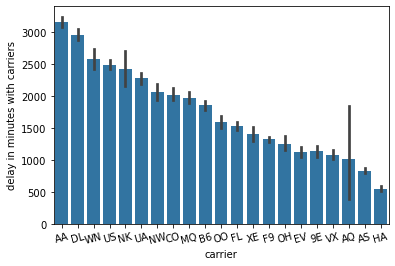

In [37]:
#lets see relation between the delays and air ports and cariers 
base_color = sb.color_palette()[0]

type_order = ['AA','DL','WN','US','NK','UA','NW','CO','MQ','B6','OO','FL','XE','F9','OH','EV','9E','VX','AQ','AS'
             ,'HA']

sb.barplot(data=delay_data_df, x='carrier', y='arr_delay', color=base_color, order=type_order)
plt.xticks(rotation=15);
plt.ylabel('delay in minutes with carriers')

Text(0, 0.5, 'counts for dely events with carriers')

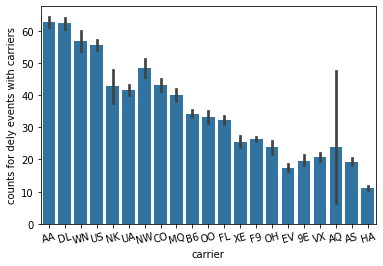

In [38]:
#lets see for same order delay counts 
base_color = sb.color_palette()[0]

type_order = ['AA','DL','WN','US','NK','UA','NW','CO','MQ','B6','OO','FL','XE','F9','OH','EV','9E','VX','AQ','AS'
             ,'HA']

sb.barplot(data=delay_data_df, x='carrier', y='total_ct', color=base_color, order=type_order)
plt.xticks(rotation=15);
plt.ylabel('counts for dely events with carriers')

Text(0, 0.5, 'count of flights for every carier')

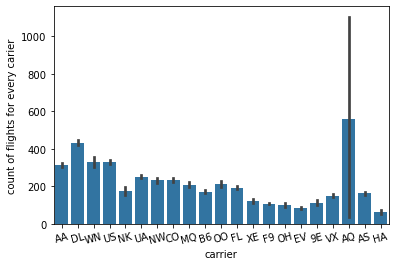

In [39]:
#lets see for same order count of flights
base_color = sb.color_palette()[0]

type_order = ['AA','DL','WN','US','NK','UA','NW','CO','MQ','B6','OO','FL','XE','F9','OH','EV','9E','VX','AQ','AS'
             ,'HA']

sb.barplot(data=delay_data_df, x='carrier', y='arr_flights', color=base_color, order=type_order)
plt.xticks(rotation=15);
plt.ylabel('count of flights for every carier')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
 
 - the number of flights doesnt affect the dellay per carrier, or the higher flight counts for the carier doesnt affect the dellay in flights as count or as number of minutes

 - months like 6,7,12 has higher delay average than others, and also it is not affected by number of flights in this months,

 - security dely is least common to happend delay and when it happens it cause very few minutes to delay ranges from 0 to 20 minutes on average

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 - carrier delay correlate with nas delay and arrive late delay (these thress values may depend on each other)

## Multivariate Exploration

The main thing I want to explore in this part of the analysis to farther investigate relation for nas delay , carrier delay late arrive delay and them all with the total delay.

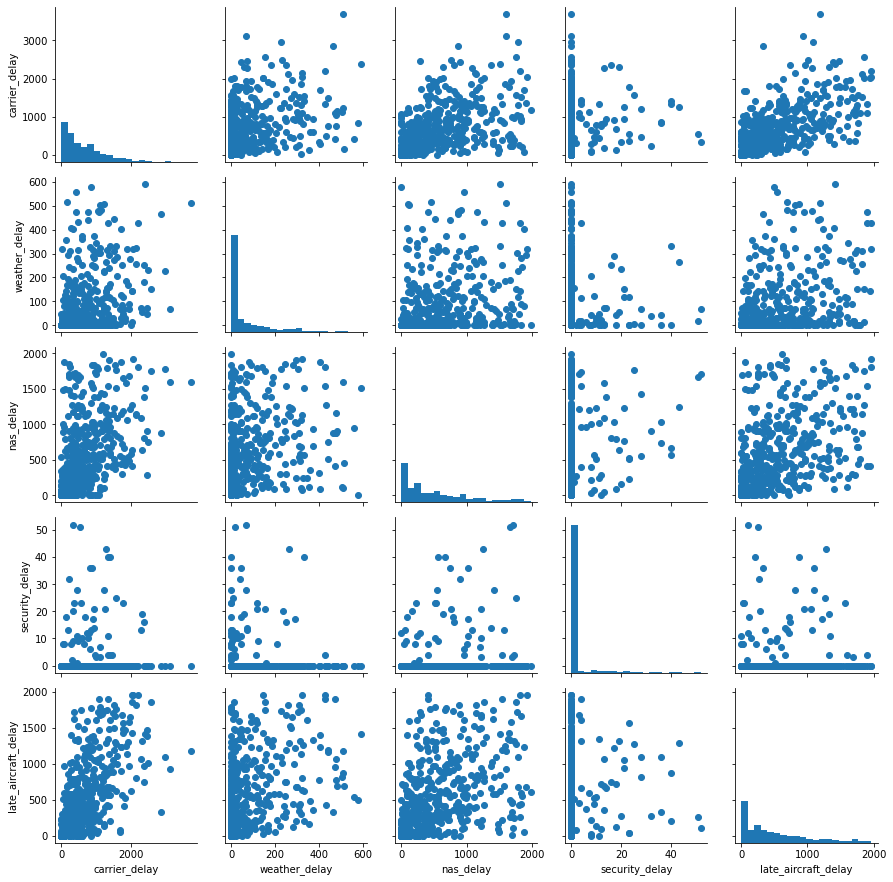

In [40]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(delay_data_df.shape[0], 500, replace = False)
minutes_col = [ 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']
samp_ = delay_data_df.loc[samples,minutes_col]

g = sb.PairGrid(data = samp_, vars = minutes_col)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

positive correlation between (nas ,late_aircraft )

### Were there any interesting or surprising interactions between features?

late_aircraft_dely correlate with carrier delay and nas dely there may be causality between them or not 

In [41]:
!jupyter nbconvert Flights_data.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Flights_data.ipynb to slides
[NbConvertApp] Writing 980075 bytes to Flights_data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Hasnaa\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Hasnaa\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Hasnaa\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Hasnaa\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Hasnaa\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\User